In [9]:
from empath import Empath
import pandas as pd
import matplotlib.pyplot as plt
import datetime

lexicon = Empath()

# Loading the processed DataFrame into notebook
final_df = pd.read_pickle("/Users/Justin/Desktop/ADA_project/final_dataset/quotes_no_firearmo_no_unkown_speakers_with_sent_scores.pkl", compression='infer')

# Remove hour from date timestamp: 
final_df['date'] = final_df.date.dt.date

# New column with only year and month:
final_df['month_year'] = pd.to_datetime(final_df.date, format='%Y-%m-%d') # format the datetime
final_df['month_year'] = final_df['month_year'].dt.strftime('%Y-%m') # extract only year and month

final_df.head()

,speaker,qids,date,quotation,keyword,scores,compound,sent_type,tokens,N of tokens,N_of_tokens,month_year
0,President Obama,[Q76],2015-07-23,If you look at the number killed by gun violen...,gun violence,"{'neg': 0.213, 'neu': 0.733, 'pos': 0.054, 'co...",-0.8271,NEG,"[If, you, look, at, the, number, killed, by, g...",53,53,2015-07
1,Donald Trump,"[Q22686, Q27947481]",2015-09-19,"scary sounding phrases like `assault weapons,'...",assault weapon,"{'neg': 0.561, 'neu': 0.344, 'pos': 0.095, 'co...",-0.9042,NEG,"[scary, sounding, phrases, like, `, assault, w...",25,25,2015-09
2,President Obama,[Q76],2015-12-02,It's still an active situation. FBI is on the ...,"mass shooting, firearm","{'neg': 0.059, 'neu': 0.85, 'pos': 0.091, 'com...",0.8902,POS,"[It, 's, still, an, active, situation, ., FBI,...",301,301,2015-12
3,Ted Cruz,[Q2036942],2015-04-21,"So far, Ted Cruz, in my opinion would be best ...",gun owner,"{'neg': 0.114, 'neu': 0.714, 'pos': 0.171, 'co...",0.5256,POS,"[So, far, ,, Ted, Cruz, ,, in, my, opinion, wo...",40,40,2015-04
4,Hillary Rodham Clinton,[Q6294],2015-10-25,"Stopping gun violence is worth fighting for, a...",gun violence,"{'neg': 0.505, 'neu': 0.286, 'pos': 0.21, 'com...",-0.7351,NEG,"[Stopping, gun, violence, is, worth, fighting,...",15,15,2015-10


In [34]:
# Import mass shooting dataset:

DATA_FOLDER = '/Users/Justin/Desktop/ADA_project/shooting_dataset/'

MASS_SHOOTINGS_15 = DATA_FOLDER+"massshootings15.csv"
MASS_SHOOTINGS_16 = DATA_FOLDER+"massshootings16.csv"
MASS_SHOOTINGS_17 = DATA_FOLDER+"massshootings17.csv"
MASS_SHOOTINGS_18 = DATA_FOLDER+"massshootings18.csv"
MASS_SHOOTINGS_19 = DATA_FOLDER+"massshootings19.csv"
ACCIDENTS = DATA_FOLDER+"accidents.csv"

mass_shootings_15 = pd.read_csv(MASS_SHOOTINGS_15)
mass_shootings_16 = pd.read_csv(MASS_SHOOTINGS_16)
mass_shootings_17 = pd.read_csv(MASS_SHOOTINGS_17)
mass_shootings_18 = pd.read_csv(MASS_SHOOTINGS_18)
mass_shootings_19 = pd.read_csv(MASS_SHOOTINGS_19)
accidents = pd.read_csv(ACCIDENTS)

mass_shootings=pd.concat([mass_shootings_15, mass_shootings_16, mass_shootings_17, mass_shootings_18,
                          mass_shootings_19], ignore_index=True)

mass_shootings = mass_shootings.drop(columns=['State', 'City Or County', 'Address', 'Operations'])
mass_shootings['Category']='Mass Shooting'
mass_shootings['Incident Date'] = pd.to_datetime(mass_shootings['Incident Date'])
accidents = accidents.drop(columns=['State', 'City Or County', 'Address', 'Operations'])
accidents = accidents[~accidents['Incident Date'].str.contains("2021")]
accidents = accidents[~accidents['Incident Date'].str.contains("2020")]
accidents['Category']='Accident'
accidents['Incident Date'] = pd.to_datetime(accidents['Incident Date'])


mass_shootings.sort_values('Incident Date', ascending=True).head()

,Incident ID,Incident Date,# Killed,# Injured,Category
334,272016,2015-01-01,0,5,Mass Shooting
333,273965,2015-01-02,1,4,Mass Shooting
332,273397,2015-01-04,3,1,Mass Shooting
331,273535,2015-01-04,2,4,Mass Shooting
330,274867,2015-01-06,1,3,Mass Shooting


In [23]:
hate = []
aggression = []
joy = []
pride = []
nervousness = []
suffering = []
fear = []

cats = ["hate", "aggression", "joy", "pride", "nervousness", "suffering", "fear"]

for quote in final_df.quotation:
    empath_features = lexicon.analyze(quote, categories = cats, normalize = True)
    hate.append(empath_features["hate"])
    aggression.append(empath_features["aggression"])
    joy.append(empath_features["joy"])
    pride.append(empath_features["pride"])
    nervousness.append(empath_features["nervousness"])
    suffering.append(empath_features["suffering"])
    fear.append(empath_features["fear"])

data = {'hate': hate, 'aggression': aggression, 'joy': joy, 'pride': pride, 'nervousness': nervousness,
        'suffering': suffering, 'fear': fear}
emotion_df = pd.DataFrame(data)
emotion_df['date'] = final_df['date'].values
emotion_df['month_year'] = final_df['month_year'].values


In [24]:
# Average score of each category per day: 

hate = []
aggression = []
joy = []
pride = []
nervousness = []
suffering = []
fear = []
date = []

grouped_df = emotion_df.groupby(['month_year'])
for group in grouped_df:
    date.append(group[0])
    hate.append(group[1].hate.mean())
    aggression.append(group[1].aggression.mean())
    joy.append(group[1].joy.mean())
    pride.append(group[1].pride.mean())
    nervousness.append(group[1].nervousness.mean())
    suffering.append(group[1].suffering.mean())
    fear.append(group[1].fear.mean())

data = {'date': date, 'hate': hate, 'aggression': aggression, 'joy': joy, 'pride': pride, 
         'nervousness': nervousness, 'suffering': suffering, 'fear': fear}
daily_emotion_df = pd.DataFrame(data)
daily_emotion_df.head()

,date,hate,aggression,joy,pride,nervousness,suffering,fear
0,2015-01,0.000990,0.008477,0.000519,0.000240,0.000363,0.002780,0.001736
1,2015-02,0.001449,0.010304,0.000000,0.000545,0.001376,0.003264,0.002016
2,2015-03,0.000753,0.011589,0.000100,0.000954,0.000436,0.001826,0.000681
3,2015-04,0.001568,0.011013,0.000000,0.001760,0.000393,0.002999,0.000947
4,2015-05,0.001100,0.011545,0.000742,0.000473,0.000677,0.001736,0.000988


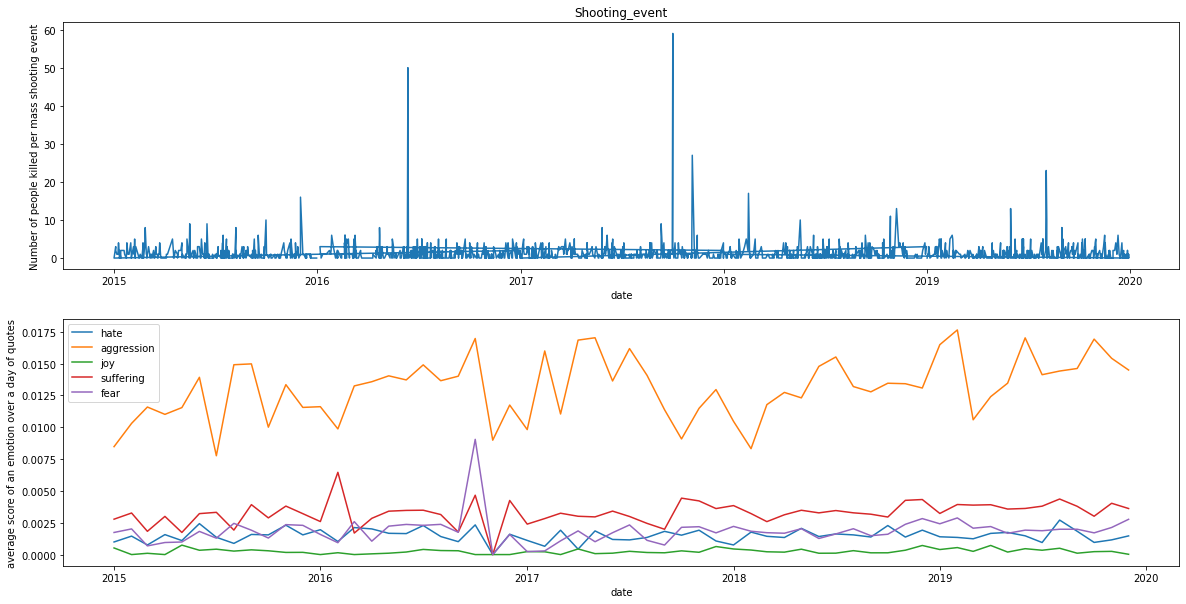

In [35]:
# Set the dates back to date_time in order to graph easily
daily_emotion_df.date=pd.to_datetime(daily_emotion_df.date)

fig, ax = plt.subplots(2, 1);
fig.set_size_inches(20, 10)

ax[0].plot(mass_shootings['Incident Date'], mass_shootings['# Killed']);
ax[0].set_title('Shooting_event');
ax[0].set_xlabel("date");
ax[0].set_ylabel('Number of people killed per mass shooting event');

ax[1].plot(daily_emotion_df.date, daily_emotion_df.hate,label = "hate");
ax[1].plot(daily_emotion_df.date, daily_emotion_df.aggression,label = "aggression");
ax[1].plot(daily_emotion_df.date, daily_emotion_df.joy,label = "joy");
#ax[1].plot(daily_emotion_df.date, daily_emotion_df.pride,label = "pride");
#ax[1].plot(daily_emotion_df.date, daily_emotion_df.nervousness,label = "nervousness");
ax[1].plot(daily_emotion_df.date, daily_emotion_df.suffering,label = "suffering");
ax[1].plot(daily_emotion_df.date, daily_emotion_df.fear,label = "fear");

ax[1].set_xlabel("date");
ax[1].set_ylabel("average score of an emotion over a day of quotes");
ax[1].legend();
